# RobertTraining

In [1]:
import os
from pathlib import Path
import subprocess

nntile_dir = Path.cwd() / ".."

# Set environment variables
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # Limit CUDA visibility
os.environ["OMP_NUM_THREADS"] = "1" # Disable BLAS parallelism
os.environ["PYTHONPATH"] = str(nntile_dir / "build" / "wrappers" / "python") # Path to a binary dir of NNTile Python wrappers

# All StarPU environment variables are available at https://files.inria.fr/starpu/doc/html/ExecutionConfigurationThroughEnvironmentVariables.html
os.environ["STARPU_NCPU"] = "2" # Use only 1 CPU core
os.environ["STARPU_NCUDA"] = "1" # Use only 1 CUDA device
os.environ["STARPU_SILENT"] = "1" # Do not show lots of StarPU outputs
os.environ["STARPU_SCHED"] = "dmdasd" # Name StarPU scheduler to be used
os.environ["STARPU_FXT_TRACE"] = "0" # Do not generate FXT traces
os.environ["STARPU_WORKERS_NOBIND"] = "1" # Do not bind workers (it helps if several instances of StarPU run in parallel)
os.environ["STARPU_PROFILING"] = "1" # This efeature/lion-optimizernables logging performance of workers and bandwidth of memory nodes
os.environ["STARPU_HOME"] = str(Path.cwd() / "starpu") # Main directory in which StarPU stores its configuration files
os.environ["STARPU_PERF_MODEL_DIR"] = str(Path(os.environ["STARPU_HOME"]) / "sampling") # Main directory in which StarPU stores its performance model files
os.environ["STARPU_PERF_MODEL_HOMOGENEOUS_CPU"] = "1" # Assume all CPU cores are equal
os.environ["STARPU_PERF_MODEL_HOMOGENEOUS_CUDA"] = "1" # Assume all CUDA devices are equal
os.environ["STARPU_HOSTNAME"] = "Roberta_example" # Force the hostname to be used when managing performance model files
os.environ["STARPU_FXT_PREFIX"] = str(Path(os.environ["STARPU_HOME"]) / "fxt") # Directory to store FXT traces if enabled

In [14]:
# Prepare TinyStories dataset into train.bin file
# Describe parameters and arguments
!python ../wrappers/python/examples/mlm_data_preparation.py --seq-len=512 \
                                                            --batch-size=8 \
                                                            --dataset-select=100 \
                                                            --hf-tokenizer="FacebookAI/roberta-base"

In [23]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/roberta_training.py --pretrained=local \
                                                        --config-path="../wrappers/python/examples/roberta_config.json" \
                                                        --save-checkpoint-path=".model/nntile_checkpoint.pt" \
                                                        --optimizer="lion" --lr=1e-5 --dtype=fp32_fast_fp16 \
                                                        --nepochs=3  --batch-size=8 --minibatch-size=4 --seq-len=512 \
                                                        --dataset-file="tinystories/train.bin" --restrict="cuda"

Namespace(remote_model_name='FacebookAI/roberta-base', pretrained='local', checkpoint_path='', config_path='../wrappers/python/examples/roberta_config.json', save_checkpoint_path='.model/nntile_checkpoint.pt', optimizer='lion', model_path='.model', seq_len=512, seq_len_tile=-1, batch_size=8, minibatch_size=4, minibatch_size_tile=-1, hidden_size_tile=-1, intermediate_size_tile=-1, n_head_tile=-1, dtype='fp32_fast_fp16', restrict='cuda', flash_attention=False, use_redux=False, dataset_path='.data', dataset_file='tinystories/train.bin', lr=1e-05, nepochs=3, label_mask_token=3, n_masked_tokens_per_seq=3, logger=False, logger_server_addr='localhost', logger_server_port=5001)
RobertaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "initializer_range": 0.02,
  

In [27]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/roberta_training.py --pretrained=local --checkpoint-path=".model/nntile_checkpoint.pt" \
                                                        --config-path="../wrappers/python/examples/roberta_config.json" \
                                                        --save-checkpoint-path=".model/nntile_further_checkpoint.pt" \
                                                        --optimizer="lion" --lr=1e-5 --dtype=fp32_fast_fp16 \
                                                        --nepochs=3 --batch-size=8 --minibatch-size=4 \
                                                        --dataset-file="tinystories/train.bin" --seq-len=512

Namespace(remote_model_name='FacebookAI/roberta-base', pretrained='local', checkpoint_path='.model/nntile_checkpoint.pt', config_path='../wrappers/python/examples/roberta_config.json', save_checkpoint_path='.model/nntile_further_checkpoint.pt', optimizer='lion', model_path='.model', seq_len=512, seq_len_tile=-1, batch_size=8, minibatch_size=4, minibatch_size_tile=-1, hidden_size_tile=-1, intermediate_size_tile=-1, n_head_tile=-1, dtype='fp32_fast_fp16', restrict=None, flash_attention=False, use_redux=False, dataset_path='.data', dataset_file='tinystories/train.bin', lr=1e-05, nepochs=3, label_mask_token=3, n_masked_tokens_per_seq=3, logger=False, logger_server_addr='localhost', logger_server_port=5001)
/home/jovyan/lion-step/nntile/notebooks/../wrappers/python/examples/roberta_training.py:131: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data

In [28]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/roberta_training.py --restrict="cuda" --pretrained=remote \
                                                        --save-checkpoint-path=".model/nntile_remote_checkpoint.pt" \
                                                        --optimizer="adam" --lr=1e-13 --dtype=bf16 --nepochs=3 \
                                                        --batch-size=8 --minibatch-size=4 --seq-len=512  \
                                                        --dataset-file="tinystories/train.bin"

Namespace(remote_model_name='FacebookAI/roberta-base', pretrained='remote', checkpoint_path='', config_path='', save_checkpoint_path='.model/nntile_remote_checkpoint.pt', optimizer='adam', model_path='.model', seq_len=512, seq_len_tile=-1, batch_size=8, minibatch_size=4, minibatch_size_tile=-1, hidden_size_tile=-1, intermediate_size_tile=-1, n_head_tile=-1, dtype='bf16', restrict='cuda', flash_attention=False, use_redux=False, dataset_path='.data', dataset_file='tinystories/train.bin', lr=1e-13, nepochs=3, label_mask_token=3, n_masked_tokens_per_seq=3, logger=False, logger_server_addr='localhost', logger_server_port=5001)
model.safetensors: 100%|██████████████████████| 499M/499M [00:03<00:00, 143MB/s]
RobertaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "FacebookAI/roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
 

# GPT2-lmhead

In [5]:
# Preliminary setup of experimental environment
import os
from pathlib import Path
import subprocess

nntile_dir = Path.cwd() / ".."

# Set environment variables
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # Limit CUDA visibility
os.environ["OMP_NUM_THREADS"] = "1" # Disable BLAS parallelism
os.environ["PYTHONPATH"] = str(nntile_dir / "build" / "wrappers" / "python") # Path to a binary dir of NNTile Python wrappers

# All StarPU environment variables are available at https://files.inria.fr/starpu/doc/html/ExecutionConfigurationThroughEnvironmentVariables.html
os.environ["STARPU_NCPU"] = "1" # Use only 1 CPU core
os.environ["STARPU_NCUDA"] = "1" # Use only 1 CUDA device
os.environ["STARPU_SILENT"] = "1" # Do not show lots of StarPU outputs
os.environ["STARPU_SCHED"] = "dmdasd" # Name StarPU scheduler to be used
os.environ["STARPU_FXT_TRACE"] = "0" # Do not generate FXT traces
os.environ["STARPU_WORKERS_NOBIND"] = "1" # Do not bind workers (it helps if several instances of StarPU run in parallel)
os.environ["STARPU_PROFILING"] = "1" # This enables logging performance of workers and bandwidth of memory nodes
os.environ["STARPU_HOME"] = str(Path.cwd() / "starpu") # Main directory in which StarPU stores its configuration files
os.environ["STARPU_PERF_MODEL_DIR"] = str(Path(os.environ["STARPU_HOME"]) / "sampling") # Main directory in which StarPU stores its performance model files
os.environ["STARPU_PERF_MODEL_HOMOGENEOUS_CPU"] = "1" # Assume all CPU cores are equal
os.environ["STARPU_PERF_MODEL_HOMOGENEOUS_CUDA"] = "1" # Assume all CUDA devices are equal
os.environ["STARPU_HOSTNAME"] = "GPT2_example" # Force the hostname to be used when managing performance model files
os.environ["STARPU_FXT_PREFIX"] = str(Path(os.environ["STARPU_HOME"]) / "fxt") # Directory to store FXT traces if enabled

In [6]:
# Prepare TinyStories dataset into train.bin file
!python ../wrappers/python/examples/causal_lm_data_preparation.py \
    --hf-tokenizer="openai-community/gpt2" --seq-len=512 --batch-size=256 --dataset-select=5000

Token indices sequence length is longer than the specified maximum sequence length for this model (1106 > 1024). Running this sequence through the model will result in indexing errors


In [2]:
# Launch an external python process to train gpt2_lmhead model on TinyStories
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/gpt2_lmhead_training.py \
    --restrict="cuda" --pretrained=local --config-path="../wrappers/python/examples/gpt2_default_config.json" \
    --save-checkpoint-path=".model/nntile_checkpoint.pt" --optimizer="lion" --lr=1e-4 --dtype=fp32 --nepochs=1 \
    --batch-size=256 --minibatch-size=8 --dataset-file="tinystories/train.bin"

2025-03-29 15:35:12.881837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 15:35:12.898796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743251712.917255 3122317 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743251712.922648 3122317 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743251712.937372 3122317 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
# Launch an external python process to finetune a pretrained NNTile gpt2_lmhead model on TinyStories
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/gpt2_lmhead_training.py \
    --restrict="cuda" --pretrained=local --checkpoint-path=".model/nntile_checkpoint.pt" \
    --config-path="../wrappers/python/examples/gpt2_default_config.json" \
    --save-checkpoint-path=".model/nntile_further_checkpoint.pt" --optimizer="lion" --lr=1e-4 --dtype=fp32 \
    --restrict="cuda" --nepochs=1 --batch-size=256 --minibatch-size=8 --dataset-file="tinystories/train.bin"

2025-03-29 15:37:38.205796: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 15:37:38.221348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743251858.240091 3122336 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743251858.245702 3122336 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743251858.260830 3122336 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [8]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/gpt2_lmhead_training.py \
    --restrict="cuda" --pretrained=remote --save-checkpoint-path=".model/nntile_remote_checkpoint.pt"\
    --optimizer="lion" --lr=1e-4 --dtype=fp32 --nepochs=5 --batch-size=256 --minibatch-size=8 \
    --dataset-file="tinystories/train.bin"

2025-03-29 15:46:23.456236: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 15:46:23.472777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743252383.492022 3122385 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743252383.497708 3122385 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743252383.513303 3122385 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [29]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/gpt2_lmhead_training.py \
    --restrict="cuda" --pretrained=remote --save-checkpoint-path=".model/nntile_remote_checkpoint.pt"\
    --optimizer="sgd" --lr=2e-3 --dtype=fp32 --nepochs=5 --batch-size=256 --minibatch-size=8 \
    --dataset-file="tinystories/train.bin"

2025-03-31 11:42:56.735559: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 11:42:56.752675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743410576.771128 3127700 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743410576.776592 3127700 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743410576.792214 3127700 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [30]:
!LD_LIBRARY_PATH=/home/jovyan/mikhalev/install/starpu-1.4.7/lib python ../wrappers/python/examples/gpt2_lmhead_training.py \
    --restrict="cuda" --pretrained=remote --save-checkpoint-path=".model/nntile_remote_checkpoint.pt"\
    --optimizer="adam" --lr=1e-4 --dtype=fp32 --nepochs=5 --batch-size=256 --minibatch-size=8 \
    --dataset-file="tinystories/train.bin"

2025-03-31 11:48:08.223512: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 11:48:08.241222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743410888.259790 3127714 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743410888.265298 3127714 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743410888.280784 3127714 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [34]:
lion_output = """
Batch=1/3 Epoch=1/5 Loss=2.3521857261657715
Batch=2/3 Epoch=1/5 Loss=2.343698263168335
Batch=3/3 Epoch=1/5 Loss=2.261173963546753
Batch=1/3 Epoch=2/5 Loss=2.1700735092163086
Batch=2/3 Epoch=2/5 Loss=2.1845662593841553
Batch=3/3 Epoch=2/5 Loss=2.221137762069702
Batch=1/3 Epoch=3/5 Loss=2.07147216796875
Batch=2/3 Epoch=3/5 Loss=2.09250807762146
Batch=3/3 Epoch=3/5 Loss=2.0862245559692383
Batch=1/3 Epoch=4/5 Loss=2.0215563774108887
Batch=2/3 Epoch=4/5 Loss=2.026759624481201
Batch=3/3 Epoch=4/5 Loss=2.022552251815796
Batch=1/3 Epoch=5/5 Loss=1.965839147567749
Batch=2/3 Epoch=5/5 Loss=1.961474895477295
Batch=3/3 Epoch=5/5 Loss=1.9754010438919067
"""

sgd_output = """
Batch=1/3 Epoch=1/5 Loss=2.3521852493286133
Batch=2/3 Epoch=1/5 Loss=2.3762824535369873
Batch=3/3 Epoch=1/5 Loss=2.3990185260772705
Batch=1/3 Epoch=2/5 Loss=2.346653461456299
Batch=2/3 Epoch=2/5 Loss=2.371061086654663
Batch=3/3 Epoch=2/5 Loss=2.3944127559661865
Batch=1/3 Epoch=3/5 Loss=2.3422625064849854
Batch=2/3 Epoch=3/5 Loss=2.3668525218963623
Batch=3/3 Epoch=3/5 Loss=2.390597343444824
Batch=1/3 Epoch=4/5 Loss=2.338599920272827
Batch=2/3 Epoch=4/5 Loss=2.3632991313934326
Batch=3/3 Epoch=4/5 Loss=2.3872923851013184
Batch=1/3 Epoch=5/5 Loss=2.3354241847991943
Batch=2/3 Epoch=5/5 Loss=2.3601901531219482
Batch=3/3 Epoch=5/5 Loss=2.384322166442871
"""

adam_output = """
Batch=1/3 Epoch=1/5 Loss=2.3521852493286133
Batch=2/3 Epoch=1/5 Loss=2.3436572551727295
Batch=3/3 Epoch=1/5 Loss=2.252114772796631
Batch=1/3 Epoch=2/5 Loss=2.146138906478882
Batch=2/3 Epoch=2/5 Loss=2.157620429992676
Batch=3/3 Epoch=2/5 Loss=2.149712085723877
Batch=1/3 Epoch=3/5 Loss=2.074185609817505
Batch=2/3 Epoch=3/5 Loss=2.080732583999634
Batch=3/3 Epoch=3/5 Loss=2.071643829345703
Batch=1/3 Epoch=4/5 Loss=2.005936622619629
Batch=2/3 Epoch=4/5 Loss=2.0246453285217285
Batch=3/3 Epoch=4/5 Loss=2.022139549255371
Batch=1/3 Epoch=5/5 Loss=1.9591394662857056
Batch=2/3 Epoch=5/5 Loss=1.9789773225784302
Batch=3/3 Epoch=5/5 Loss=1.9810774326324463
"""

lion_output
     epoch  batch      loss
0       1      1  2.352186
1       1      2  2.343698
2       1      3  2.261174
3       2      1  2.170074
4       2      2  2.184566
5       2      3  2.221138
6       3      1  2.071472
7       3      2  2.092508
8       3      3  2.086225
9       4      1  2.021556
10      4      2  2.026760
11      4      3  2.022552
12      5      1  1.965839
13      5      2  1.961475
14      5      3  1.975401
adam_output
     epoch  batch      loss
0       1      1  2.352185
1       1      2  2.343657
2       1      3  2.252115
3       2      1  2.146139
4       2      2  2.157620
5       2      3  2.149712
6       3      1  2.074186
7       3      2  2.080733
8       3      3  2.071644
9       4      1  2.005937
10      4      2  2.024645
11      4      3  2.022140
12      5      1  1.959139
13      5      2  1.978977
14      5      3  1.981077


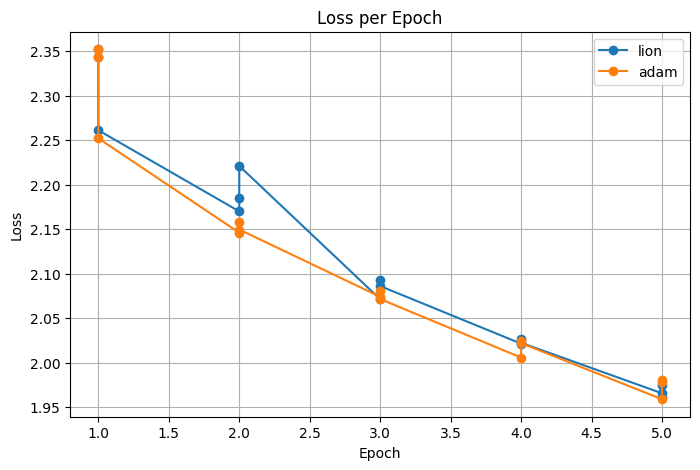

In [36]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Define a regex pattern that captures the batch, epoch, and loss values.
# This pattern ignores the total counts (e.g. "3" in "1/3") and "5" in "1/5".
pattern = r"Batch=(\d+)/\d+\s+Epoch=(\d+)/\d+\s+Loss=([\d\.]+)"

data = []

for line in lion_output.strip().splitlines():
    match = re.search(pattern, line)
    if match:
        batch = int(match.group(1))
        epoch = int(match.group(2))
        loss = float(match.group(3))
        data.append({"epoch": epoch, "batch": batch, "loss": loss})

df = pd.DataFrame(data)
print("lion_output\n", df)

plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['loss'], marker='o', linestyle='-', label="lion")

data = []

for line in adam_output.strip().splitlines():
    match = re.search(pattern, line)
    if match:
        batch = int(match.group(1))
        epoch = int(match.group(2))
        loss = float(match.group(3))
        data.append({"epoch": epoch, "batch": batch, "loss": loss})

df = pd.DataFrame(data)
print("adam_output\n", df)

plt.plot(df['epoch'], df['loss'], marker='o', linestyle='-', label="adam")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()